In [150]:
# Reference https://www.youtube.com/watch?v=gCWBFyFTxVU
# Dataset https://www.kaggle.com/mlg-ulb/creditcardfraud

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot

import numpy as np
import seaborn as sns

# ml models decistion tree
from sklearn.tree import DecisionTreeClassifier

# One of the Ensemle model -- Random Forset which is ensemple of decision trees
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier

# import logistic regression, SVC  for ensembling
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC

# Naive Bayes
from sklearn.naive_bayes import MultinomialNB

# Distance based
from sklearn.neighbors import KNeighborsClassifier

# packages for metric for evalaution of the models
from sklearn import metrics
from sklearn.metrics import classification_report , accuracy_score, confusion_matrix

# to save the models so that we don't need to train the models every time we need to do prediction
from sklearn.externals import joblib

# Rule based classifier
from sklearn.dummy import DummyClassifier

# let's do some moedelling
from sklearn.model_selection import train_test_split, cross_val_score





In [151]:
df = pd.read_csv(r'C:\Users\Adarsh\uOttawa\ML Course Project-7Apr\datasets\2_numeric_data.csv')

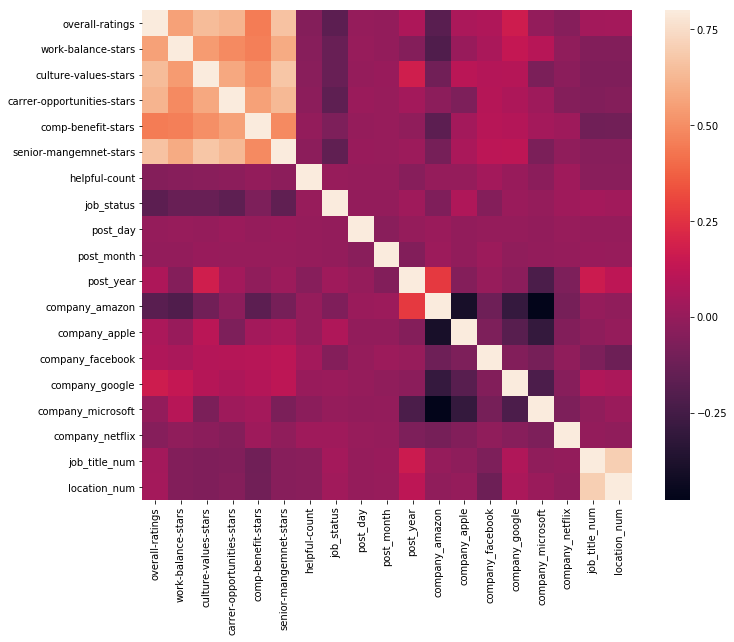

In [152]:
# it can be easily seen, this is also a class imbalance problem
# let's see the correlation between the features
corr_matrix = df.corr()

# plot the correlation matrix's heatmap
fig = plt.figure( figsize= (12, 9 ) )
sns.heatmap(corr_matrix, vmax= .8, square= True )

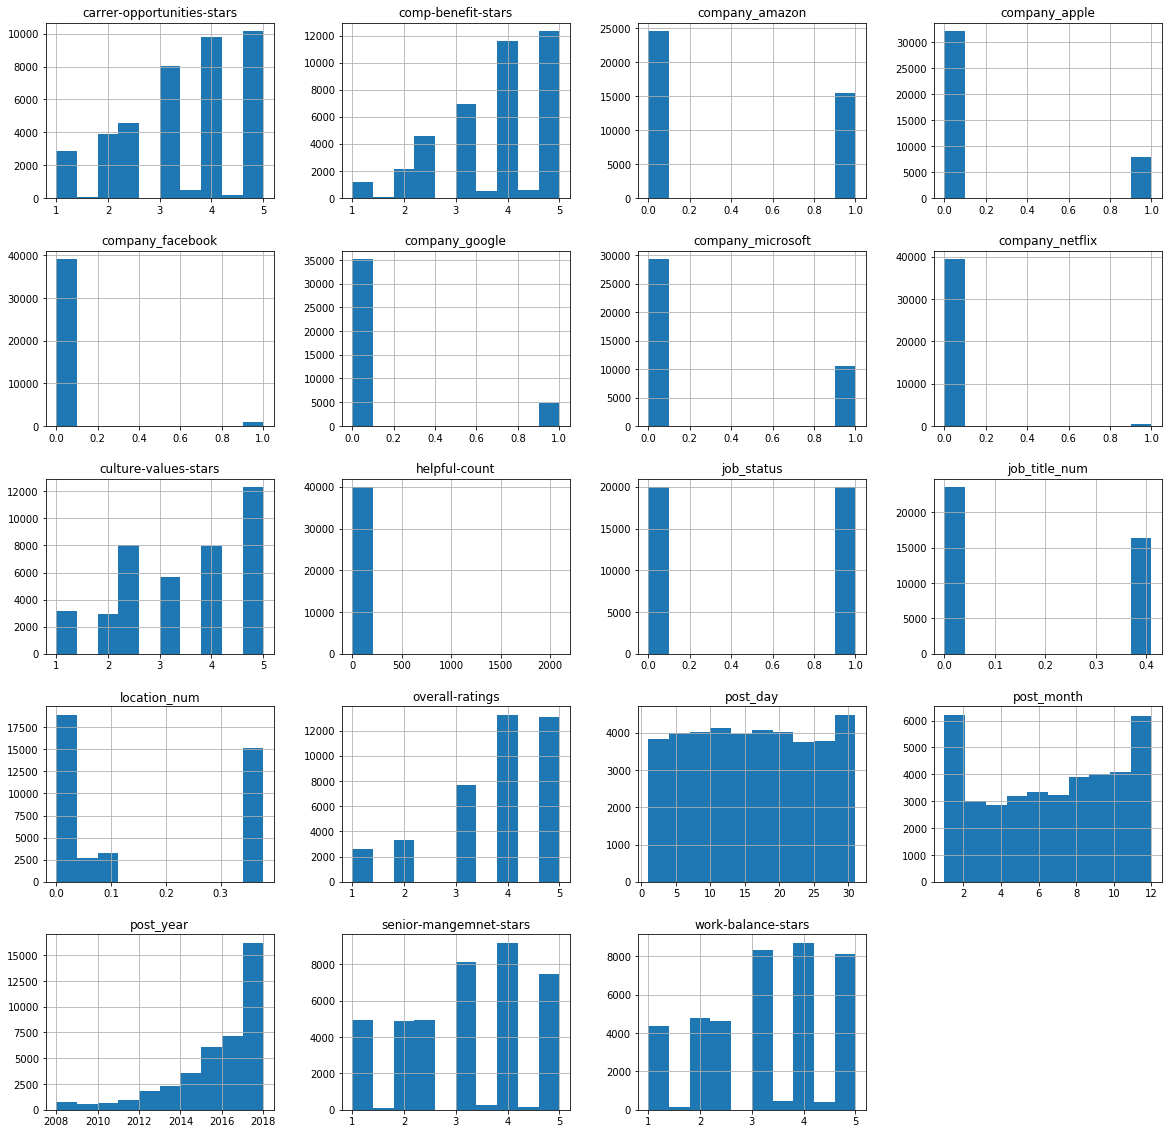

In [4]:
# plot histogram for each parameter
df.hist(figsize=(20,20))
plt.show()

In [153]:
# check for class imbalance problem
df.job_status.value_counts()


1    20000
0    20000
Name: job_status, dtype: int64

In [154]:
df.columns

Index(['overall-ratings', 'work-balance-stars', 'culture-values-stars',
       'carrer-opportunities-stars', 'comp-benefit-stars',
       'senior-mangemnet-stars', 'helpful-count', 'job_status', 'post_day',
       'post_month', 'post_year', 'company_amazon', 'company_apple',
       'company_facebook', 'company_google', 'company_microsoft',
       'company_netflix', 'job_title_num', 'location_num'],
      dtype='object')

In [155]:
# prepare for training
X = df[['overall-ratings', 'work-balance-stars', 'culture-values-stars',
       'carrer-opportunities-stars', 'comp-benefit-stars',
       'senior-mangemnet-stars', 'helpful-count', 'post_day',
       'post_month', 'post_year', 'company_amazon', 'company_apple',
       'company_facebook', 'company_google', 'company_microsoft',
       'company_netflix', 'job_title_num', 'location_num']]

Y = df['job_status']


In [156]:
X.head(2)

,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars,helpful-count,post_day,post_month,post_year,company_amazon,company_apple,company_facebook,company_google,company_microsoft,company_netflix,job_title_num,location_num
0,4.0,4.0,2.5,4.0,4.5,4.0,0,20,3,2010,1,0,0,0,0,0,0.00040,0.068375
1,5.0,5.0,5.0,5.0,5.0,5.0,0,31,10,2014,0,1,0,0,0,0,0.00005,0.018650


# Data Normalization between 0 and 1

In [157]:

# As X has negtaive values and Multinomial NB doesnt work with negative values we need to scale the data to 0 to 1
from sklearn.preprocessing import MinMaxScaler
data = X

#scaler = MinMaxScaler()

#scaler.fit(data)
scaler = MinMaxScaler(copy=True, feature_range=(0, 1))

data = scaler.fit_transform(data)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [158]:
X = data

In [159]:
# all required types of models
models = [
    # a. Linear classifier
    LogisticRegression(),
    LinearSVC(),
    
    # b. Tree-based models
    DecisionTreeClassifier(),
    
    # c. Distance-based models 
    KNeighborsClassifier(n_neighbors=5),
    
    # d. Rule-based
    DummyClassifier(),
    
    # e. Probabilistic model
    MultinomialNB()
    
]

# define 10 cross validation
CV = 10
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []

for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, X, Y, scoring='accuracy', cv=CV)
    
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))

cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
cv_df.groupby('model_name').accuracy.mean()


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

model_name
DecisionTreeClassifier    0.736575
DummyClassifier           0.496950
KNeighborsClassifier      0.634025
LinearSVC                 0.600675
LogisticRegression        0.600775
MultinomialNB             0.572075
Name: accuracy, dtype: float64

In [160]:
# Experiement with different types of ensembling
models = [
    # a. Random Forest
    RandomForestClassifier(n_estimators=10),
    
    # b. Bagging
    BaggingClassifier(DecisionTreeClassifier() , max_samples = 0.5 , max_features= 1.0 , n_estimators=20 ),
    
    # c. Boosting
    AdaBoostClassifier( DecisionTreeClassifier() , n_estimators= 10 , learning_rate= 1 )
    
    
    
]

# define 10 cross validation
CV = 10
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []

for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, X, Y, scoring='accuracy', cv=CV)
    
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))

cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
cv_df.groupby('model_name').accuracy.mean()


model_name
AdaBoostClassifier        0.743800
BaggingClassifier         0.739275
RandomForestClassifier    0.749975
Name: accuracy, dtype: float64

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X , Y, test_size = 0.2 , random_state = 4)

In [162]:
# let's try how ensemling ( Random forest wit 10 decision trees ) performs 
random_forest = RandomForestClassifier(n_estimators=10)
random_forest.fit(X_train, y_train)


filepath = r'C:\Users\Adarsh\uOttawa\ML Course Project-7Apr\saved_models\numeric-data\random_forest_model'
joblib.dump(random_forest ,filepath )
# load model for prediction
random_forest = joblib.load(filepath)

print("Accuracy = ")
print(random_forest.score(X_test, y_test))
print("\n")
y_pred_rf = random_forest.predict(X_test)
print(classification_report(y_test, y_pred_rf))

Accuracy = 
0.7395


              precision    recall  f1-score   support

           0       0.72      0.77      0.75      4010
           1       0.76      0.70      0.73      3990

   micro avg       0.74      0.74      0.74      8000
   macro avg       0.74      0.74      0.74      8000
weighted avg       0.74      0.74      0.74      8000



AUC = 0.7394121213257583


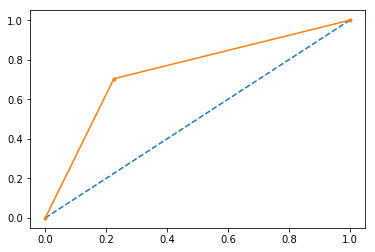

In [163]:
# calculaye fpr, tpr
fpr_rf, tpr_rf, thresholds_rf = metrics.roc_curve(y_test,  y_pred_rf)
# calculate Area Under the curve
auc_rf = metrics.roc_auc_score(y_test, y_pred_rf)

print("AUC = " + str(auc_rf))

# plot
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr_rf, tpr_rf, marker='.')
# show the plot
pyplot.show()

In [164]:
# Random Forest is performing better than Decision tree.Ensemling improved precision and F1-score.
# let's try bagging classifier
# We will give 20 Decisions Trees, each with 50% of training dataset and 100% features
bg = BaggingClassifier( DecisionTreeClassifier() , max_samples = 0.5 , max_features= 1.0 , n_estimators=20 )
bg.fit(X_train , y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=0.5, n_estimators=20, n_jobs=None, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [165]:
# save the baggign classifier model
filepath = r'C:\Users\Adarsh\uOttawa\ML Course Project-7Apr\saved_models\numeric-data\BaggingClassifier_model'
joblib.dump(bg ,filepath )
# load model for prediction
bg = joblib.load(filepath)

In [166]:
print("Accuracy = ")
print(bg.score(X_test, y_test))
print("\n")

y_pred_bg = bg.predict(X_test)
print(classification_report(y_test, y_pred))

Accuracy = 
0.72475


              precision    recall  f1-score   support

           0       0.73      0.74      0.74      4010
           1       0.74      0.72      0.73      3990

   micro avg       0.73      0.73      0.73      8000
   macro avg       0.73      0.73      0.73      8000
weighted avg       0.73      0.73      0.73      8000



AUC = 0.7247032793954962


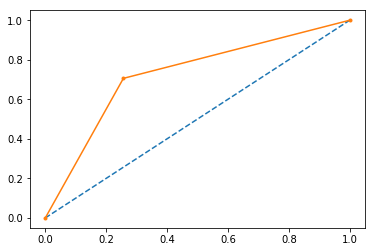

In [167]:
# calculaye fpr, tpr
fpr_bg, tpr_bg, thresholds_bg = metrics.roc_curve(y_test,  y_pred_bg)
# calculate Area Under the curve
auc_bg = metrics.roc_auc_score(y_test, y_pred_bg)

print("AUC = " + str(auc_bg))

# plot
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr_bg, tpr_bg, marker='.')
# show the plot
pyplot.show()

In [168]:
# let's see the performance of BoostingClassifier -ADABoost
# 10 decision trees , learning rate will shrink the contribution of each individual learner 
adaboost = AdaBoostClassifier( DecisionTreeClassifier() , n_estimators= 10 , learning_rate= 1 )
adaboost.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1, n_estimators=10, random_state=None)

In [169]:
# save the adaboost classifier model
filepath = r'C:\Users\Adarsh\uOttawa\ML Course Project-7Apr\saved_models\numeric-data\adaboost_model'
joblib.dump(adaboost ,filepath )
# load model for prediction
adaboost = joblib.load(filepath)

In [170]:
print("Accuracy = ")
print(adaboost.score(X_test , y_test))

print("\n")

y_pred_adaboost = adaboost.predict(X_test)
print(classification_report(y_test , y_pred_adaboost))

Accuracy = 
0.736125


              precision    recall  f1-score   support

           0       0.74      0.74      0.74      4010
           1       0.74      0.73      0.73      3990

   micro avg       0.74      0.74      0.74      8000
   macro avg       0.74      0.74      0.74      8000
weighted avg       0.74      0.74      0.74      8000



AUC = 0.7361155382221138


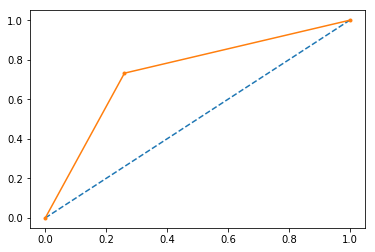

In [171]:
# calculaye fpr, tpr
fpr_adaboost, tpr_adaboost, thresholds_adaboost = metrics.roc_curve(y_test,  y_pred_adaboost)
# calculate Area Under the curve
auc_adaboost = metrics.roc_auc_score(y_test, y_pred_adaboost)

print("AUC = " + str(auc_adaboost))

# plot
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr_adaboost, tpr_adaboost, marker='.')
# show the plot
pyplot.show()

In [172]:
# let's have our own ensembles method
# a combination of decesion tree, SVM, Logistic Regression
#lr = LogisticRegression()
#dt = DecisionTreeClassifier()
# svm will have ploynomial of degree two
#svm = SVC(kernel='poly' , degree= 2)

# votoing hard means votes on the labels not on the probabilities
ensemble_vc = VotingClassifier( estimators=[ ('adaboost', adaboost) , 
                                            ('random_forest', random_forest) , 
                                            ('bg', bg)] , voting='hard' )


ensemble_vc.fit(X_train , y_train)

# save the custom ensembling classifier model 
filepath = r'C:\Users\Adarsh\uOttawa\ML Course Project-7Apr\saved_models\numeric-data\ensemble_voting_classifier_model'
joblib.dump(ensemble_vc ,filepath )
# load model for prediction
ensemble_vc = joblib.load(filepath)

print("Accuracy = ")
print(ensemble_vc.score(X_test, y_test))
print("\n")

# print the metrices for our ensemmbled model
y_pred_ensemble_vc = ensemble_vc.predict(X_test)
print( classification_report(y_test , y_pred_ensemble_vc) )

Accuracy = 
0.7415


              precision    recall  f1-score   support

           0       0.73      0.76      0.75      4010
           1       0.75      0.72      0.74      3990

   micro avg       0.74      0.74      0.74      8000
   macro avg       0.74      0.74      0.74      8000
weighted avg       0.74      0.74      0.74      8000



AUC = 0.7414571341070881


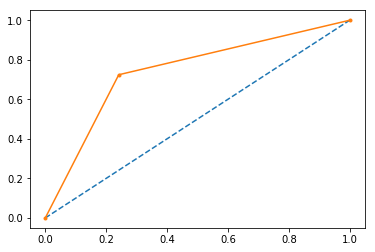

In [173]:
# calculaye fpr, tpr
fpr_vc, tpr_vc, thresholds_vc = metrics.roc_curve(y_test,  y_pred_ensemble_vc)
# calculate Area Under the curve
auc_vc = metrics.roc_auc_score(y_test, y_pred_ensemble_vc)

print("AUC = " + str(auc_vc))

# plot
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr_vc, tpr_vc, marker='.')
# show the plot
pyplot.show()

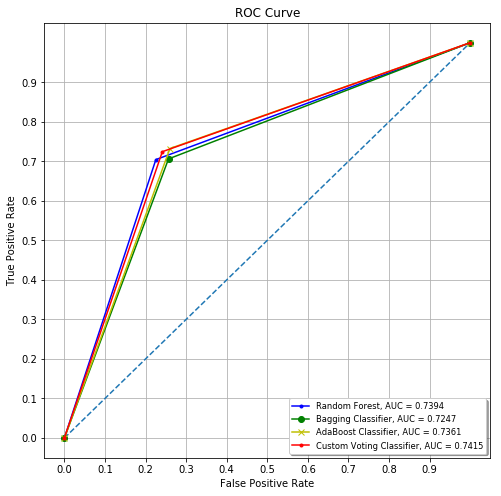

In [175]:
# Create plots with pre-defined labels.
fig, ax = plt.subplots(figsize=(8,8))

plt.xticks(np.arange(0, 1, 0.1))
plt.yticks(np.arange(0, 1, 0.1))


pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model

# Random Forest
ax.plot(fpr_rf, tpr_rf, marker='.', color = 'b',  label='Random Forest, AUC = '+str(round(auc_rf,4)))
# Bagging Classifier
ax.plot(fpr_bg, tpr_bg, marker='o', color = 'g',  label='Bagging Classifier, AUC = '+str(round(auc_bg,4)))
# AdaBoost Classifier
ax.plot(fpr_adaboost, tpr_adaboost, marker='x', color = 'y',  label='AdaBoost Classifier, AUC = '+str(round(auc_adaboost,4)))
# Custom Voting Classifier
ax.plot(fpr_vc, tpr_vc, marker='.',  color = 'r',  label='Custom Voting Classifier, AUC = '+str(round(auc_vc,4)))

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')



plt.title('ROC Curve')
plt.grid(True)

legend = ax.legend(loc='lower right', shadow=True, fontsize='small')
